# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Jakob Maurer

Datum: 22.11.2023

Gruppe: 87

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

welche Wäremkapazität besitzt die Flüssigkeit Wasser ?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.
Ein Sensor ist in dem Behälter mit kaltem wasser, der andere in der warmen Flüssigkeit. beim umfüllen der warmen in die kalte Flüssigkeit bleiben die Sensoren in ihren vorherigen behältern. Die Daten werden über einen raspberry aufgenommen und verarbeitet.


<img src="figures/capacity.JPEG" width="800">

## Versuchsauswertung

In [101]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
import json
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

 Use FST-Style, if you don't like it, you can safely delete this line.
 plt.style.use("FST.mplstyle")


IndentationError: unexpected indent (<ipython-input-101-d42212fbb361>, line 13)

### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [102]:
# TODO: 
path_data = "archive/capacity/capacity.h5"

# DONE #

In [113]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
f = h5py.File(path_data,'r+')
md = m_json.get_metadata_from_setup("archive/capacity/setup_heat_capacity.json")
#md = metadaten aus dem setup _heatcapacity
uuid_warm = "1ee849e6-7bb0-6c74-8a4f-5bf9aab74b8b"
uuid_cold = "1ee849fd-4b0b-6f67-9732-5a65450e06b2"
#es wird vorher festgelegt welcher sensor welche flüssigkeit misst
temp_warm = list(f["RawData"][uuid_warm]["temperature"])[0]
temp_cold = list(f["RawData"][uuid_cold]["temperature"])
#für die warme flüssigkeit ist nur die anfangstemperatur von bedeutung
time_warm = list(f["RawData"][uuid_warm]["timestamp"])


# DONE

65.375
[22.0625, 22.0625, 22.0625, 22.0625, 22.0625, 22.0625, 22.0625, 22.0625, 22.0625, 22.0625, 22.0625, 22.0625, 22.0, 21.9375, 21.9375, 21.875, 21.875, 22.9375, 26.375, 30.0625, 32.875, 34.875, 36.3125, 37.375, 38.1875, 38.8125, 39.3125, 39.75, 40.125, 40.4375, 40.6875, 41.0, 41.1875, 41.4375, 41.5625, 41.75, 41.8125, 41.8125, 42.0625]


#### (ii) Daten ploten

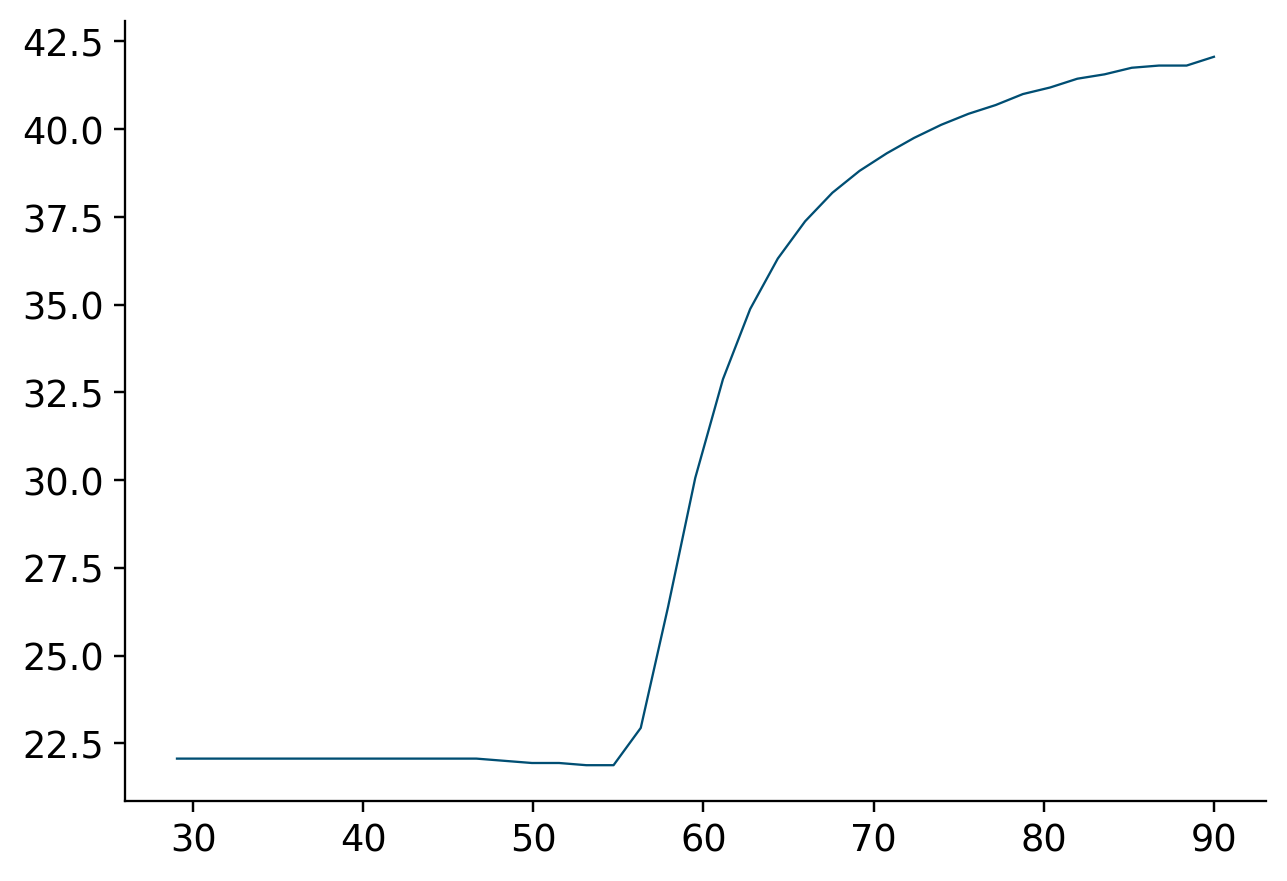

In [104]:
# TODO: Use the temperature and time data for plotting
fig = plt.figure()
#Figure erstellen
ax = fig.add_subplot(111)
plt.plot(time_warm,temp_cold)

#graph anpassen
# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [105]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.
probe_id = md["probe"]["values"][0]
masse_kalt = m_json.get_json_entry("datasheets", probe_id, ["probe","metadata"])[0]
masse_warm = m_json.get_json_entry("datasheets", probe_id, ["probe","metadata"])[1]

# DONE #

#### (iV) Anfangs- und Endwert der Temperatur

In [112]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
anfang = temp_cold[0]
#ersten Wert der Liste mit Temperaturen des Sensors für kaltes wasser nehmen
ende = temp_cold[len(temp_cold)-1]
#letzten eintrag der liste nehmen

# DONE #

22.0625


#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [114]:
# TODO: Calculate heat capacity of the calorimeter
C = ((masse_warm*water_heat_capa*(temp_warm-ende))/(ende-anfang))-(masse_kalt*water_heat_capa)

# DONE #

65.375 42.0625 22.0625


#### (Vi) Ergebnis

In [108]:
# TODO: Print result
print("wärmekapazität = "+str(C))

# DONE #

0.13846249999999993


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Bei Vergleich von Werten mit anderen kamen wir auf eine ähnliche Größenordnungen. Die Daten sind alle mit Metadaten hinerlegt und somit gut nachvollziehbar und reproduzierbar. Die geringe auflösung und viele weiter Störfaktoren führen jedoch zu einem ungenauen Ergebnis. 

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

In [109]:
#war gut,würde ich nocheinmal machen, lediglich die Datenstruktur zu erstellen war etwas aufwendig. 

SyntaxError: invalid syntax (<ipython-input-109-ce1cf1fb134d>, line 1)